# 2950 Project Phase 4

Flavia Jiang (yj472), Rachel Wang (jw879)

# Part 1 - Introduction
## Background Information:
In this project, we look for different attributes' influence on dating decision and the differences among gender.

Mate selection is a complex phenomenon influenced by various factors, where dating is the learning period for selecting potential marriage partners. 2023 data from Pew Research Center finds that three in 10 Americans are single, and about half (51%) are open to either a committed relationship or casual dates. Over half of men (56%) are looking for either a committed relationship or casual dates, and less than half of women (44%) say the same thing.

Given the important status of dating in current American's life, this research will focuses on analysis on a Speed Dating Experiement. The experiment involved participants engaging in speed dating sessions, where individuals had brief interactions and decided whether they wanted to date a potential match. The research highlights significant gender differences in decision-making during these speed dating sessions. For instance, the data shows that women are more likely to say "Yes" in their first meeting compared to men.
## Research Questions:
How accurately can we predict people's decision during the initial meet about whether they would like to meet their dates again based on their ratings on various attributes of their dates (attractiveness, sincerity, fun, intelligence, and ambition) Are some predictors less or more important for the female or male participants? 

## Summary of Findings:
We found that people are more likely to say yes to dates who are more fun and attractive.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import duckdb
from statsmodels.api import Logit
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Part 2 - Data Description

## Data Cleaning

For details, see Appendix.ipynb. The cleaned dataframe was saved to a csv file: https://github.com/flaviafafaf/info2950_project/blob/main/final/dating_main.csv

In [55]:
main_df = pd.read_csv("dating_main.csv").iloc[: , 1:]
main_df.head()

,id,gender,wave,num_dates,partner_id,age,field_cd,race,career_c,rate_self_attr,...,decision,rate_p_attr,rate_p_sinc,rate_p_intel,rate_p_fun,rate_p_amb,field,race_cd,career,gender_cd
0,4,Female,1,10,11,23,1,European/Caucasian-American,1,7,...,0,4,10,8,5,8,Law,2,Lawyer,0
1,4,Female,1,10,12,23,1,European/Caucasian-American,1,7,...,0,8,7,8,10,7,Law,2,Lawyer,0
2,4,Female,1,10,13,23,1,European/Caucasian-American,1,7,...,0,4,7,8,8,6,Law,2,Lawyer,0
3,4,Female,1,10,14,23,1,European/Caucasian-American,1,7,...,1,8,10,7,10,7,Law,2,Lawyer,0
4,4,Female,1,10,15,23,1,European/Caucasian-American,1,7,...,0,6,9,8,9,8,Law,2,Lawyer,0


## 1. What are the observations (rows) and the attributes (columns)?

Rows of main_df:

- Each row represents a dating meet between two participants (one as dater, one as datee) during experimental speed dating events.
- For example, subject 1 and subject 3 dated each other in the speed dating event. Two rows that represent this pair would be in the data set. One row has subject 1 as dater, subject 3 as datee. The other row has subject 3 as dater, subject 1 as datee. 
- Notes: a subject would date multiple subjects during the event.

Columns of main_df: 

- id: numerical, identifies the dater
- gender: categorical, gender of dater, "Female" or "Male"
- gender_cd: binary, gender coded (Male - 1, Female - 0)
- wave: numerical, identifies the speed dating event session the dater was in 
- round: numerical, number of datees a dater met in the speed dating event
- partner_id: numerical, datee’s id number
- age: numerical, age of dater (potential predictor)
- decision: whether dater would like to meet the datee again. 1=yes, 0=no (response)
- field (value) & field_cd (code) that the dater studied
    - 1 Law  
    - 2 Math
    - 3 Social Science, Psychologist 
    - 4 Medical Science, Pharmaceuticals, and Bio Tech 
    - 5 Engineering  
    - 6 English/Creative Writing/ Journalism 
    - 7 History/Religion/Philosophy 
    - 8 Business/Econ/Finance 
    - 9 Education, Academia 
    - 10 Biological Sciences/Chemistry/Physics
    - 11 Social Work 
    - 12 Undergrad/undecided 
    - 13 Political Science/International Affairs 
    - 14 Film
    - 15 Fine Arts/Arts Administration
    - 16 Languages
    - 17 Architecture
    - 18 Other
- race (value) & race_cd (code): categorical, race of dater
    - Black/African American
    - European/Caucasian-American
    - Latino/Hispanic American
    - Asian/Pacific Islander/Asian-American
    - Native American
    - Other
- career (value) & career_c (code): categorical, career of dater
    - Lawyer 
    - Academic/Research 
    - Psychologist 
    - Doctor/Medicine 
    - Engineer 
    - Creative Arts/Entertainment 
    - Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
    - Real Estate 
    - International/Humanitarian Affairs 
    - Undecided 
    - Social Work
    - Speech Pathology
    - Politics
    - Pro sports/Athletics
    - Other
    - Journalism
    - Architecture
     
- Dater's ratings on themselves for the following five attributes on a scale of 1-10: (1=awful, 10=great) (potential predictors)
    - rate_self_attr: Attractive
    - rate_self_sinc: Sincere
    - rate_self_intel: Intelligent
    - rate_self_fun: Fun
    - rate_self_amb: Ambitious
     
- Dater's ratings on partners for the following five attributes on a scale of 1-10:  (1=awful, 10=great)(potential predictors)
    - rate_p_attr: Attractive
    - rate_p_sinc: Sincere
    - rate_p_intel: Intelligent
    - rate_p_fun: Fun
    - rate_p_amb: Ambitious
    
## 2. Why was this dataset created?

This dataset was created to investigate and analyze various aspects of human dating behaviors in the context of speed dating. Researchers were interested in understanding how individuals make dating decisions, what attributes they consider important, and how different factors predict their decisions about whether to continue the relationship. The researchers were particularly interested in the gender differences in dating behaviors and decision making strategies.

## 3. Who funded the creation of the dataset?

The dataset was collected as part of academic research. 

## 4. What processes might have influenced what data was observed and recorded and what was not?

Participant Demographics: The age, gender, and demographic characteristics of the participants could influence the data collected. In this study, all subjects are from graduate and professional school of Columbia University which might cause bias for what the researcher observed.

Self-Selection of Participants: Participants in the speed dating experiment were volunteers, which means they self-selected to take part. This self-selection process may have introduced biases, as those who chose to participate might have different preferences or characteristics compared to the general population. This could impact the generalizability of the findings.

Experiment Design: The design of the speed dating experiment determined what data could be collected. The researchers structured the experiment, including the number of participants, the number of potential partners, and the available information about each partner. The experimental conditions may not fully represent real-world dating situations.

Survey Responses: The data collected was based on surveys and questionnaires filled out by participants. Data collection relied on participants' willingness to respond honestly and accurately, which could be influenced by social desirability bias or other factors. 

## 5. What preprocessing was done, and how did the data come to be in the form that you are using?

We selected columns necessary for our study. We then renamed some of the columns to more meaningful names, changed the datatypes of some columns to the most appropriate types, and removed missing data. 


## 6. If people are involved, were they aware of the data collection, and if so, what purpose did they expect the data to be used for?

Participants in the speed dating events would have been aware of the data collection process, as informed consent is a standard practice in research involving human subjects. They would have been informed about the purpose of the data collection, which is typically for academic research. Participants would have expected the data to be used to study dating behavior and potentially contribute to our understanding of human interactions and preferences.

## 7. Where can your raw source data be found, if applicable? Provide a link to the raw data

Raw data can be found in our repo: https://github.com/flaviafafaf/info2950_project/blob/main/data/speed_dating_data.csv

Codebook can also be found in our repo: 
https://github.com/flaviafafaf/info2950_project/blob/main/data/variable_codebook.doc

Link to the source data and codebook: http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/

Link to the paper written by the researchers: 
http://www.stat.columbia.edu/~gelman/stuff_for_blog/sheena.pdf

# Part 3 - Preregistration statements

**Hypothesis 1**
Generally, daters consider various attributes in the datee (attractiveness, sincerity, fun, intelligence, ambition) when deciding whether they would like to meet the datee again.

**Hypothesis 2**
Women might care more or less about the above attributes than men. That is, gender differences exist in how people make dating decisions based on various attributes of their dates.

Because for the above two hypotheses, the response variable is the same, which the is dating decision. So we will test them together in a multivariate logistic regression model.

For each of the variables in $β_{rate\_p\_attr}$, $β_{rate\_p\_sinc}$, $β_{rate\_p\_intel}$, $β_{rate\_p\_fun}$, $β_{rate\_p\_amb}$, $β_{rate\_p\_attr*gender}$, $β_{rate\_p\_sinc*gender}$, $β_{rate\_p\_intel*gender}$, $β_{rate\_p\_fun*gender}$, $β_{rate\_p\_amb*gender}$, call it $β_{i}$:

$H_{0}$: $β_{i}$ = 0 given other variables in the model

$H_{a}$: $β_{i}$ != 0 given other variables in the model

# Part 4- Data Analysis - Descriptive Analysis

## About the participants

We cared about how the sample was made up of in term of demographics because we wanted to be aware of sampling bias, which was part of data limitations that might hinder us from generalizing our model to certain different populations.

We analyzed the distribution of participants' gender, age, race, and field (see "About the Participants" in Appendix.ipynb). It turned out subjects aged below 20 or above 35, Black/African American, Latino/Hispanic American, and international students, and majors like Fine Arts/Arts Administration were underrepresented in the sample. One should be really careful about generalizing the resulting fitted model to these populations.

## About the variables

Now let's explore how female and male participants made decisions on dates similarly or differently.

In [60]:
print(main_df.groupby("gender")["decision"].mean())
print(round(main_df["decision"].mean(),3))

gender
Female    0.366365
Male      0.506028
Name: decision, dtype: float64
0.437


On average, female participants were more selective than male participants. That is, 36.6% of the times female participants expressed they would like to meet the male datee again while male participants said yes 50.6% of the times. Such finding made us more confident in the potential of our research questions about gender differences in speed dating selectivity.

The overall mean of decision is 0.437, implying both of the response classes are well represented.

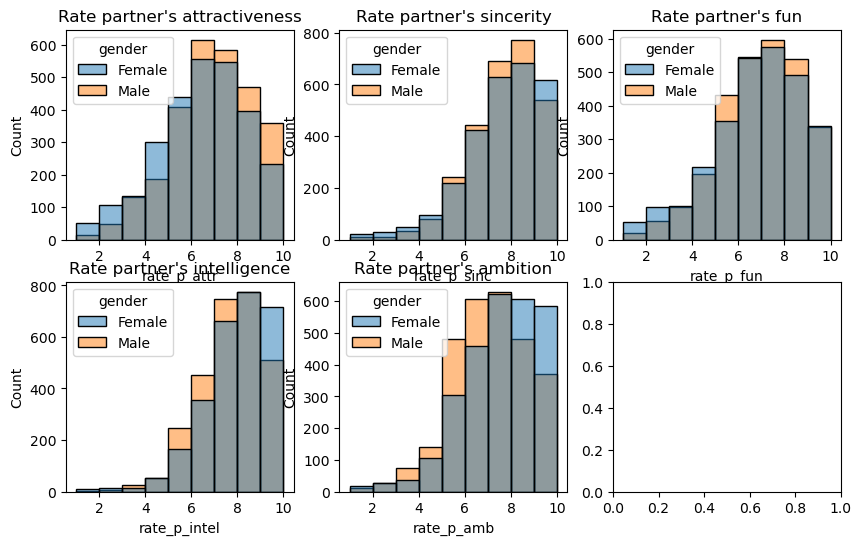

In [61]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10,6))
def draw_hist(numerical_var, bin_width, ax):
    sns.histplot(data = main_df, x = numerical_var, binwidth = bin_width, hue = "gender", ax = ax)

axs[0][0].set_title("Rate partner's attractiveness")
axs[0][1].set_title("Rate partner's sincerity")
axs[0][2].set_title("Rate partner's fun")
axs[1][0].set_title("Rate partner's intelligence")
axs[1][1].set_title("Rate partner's ambition")

draw_hist("rate_p_attr", 1, axs[0,0])
draw_hist("rate_p_sinc", 1, axs[0,1])
draw_hist("rate_p_fun", 1, axs[0,2])
draw_hist("rate_p_intel", 1, axs[1,0])
draw_hist("rate_p_amb", 1, axs[1,1])

It is interesting that on average, male participants rated their female datees' attractiveness much higher than female participants rated male datees. Female participants rated their datees' intelligence and amibition much higher than male participants rated female datees. 

So let's try to explore how daters' ratings for datees for the five attributes were associated with the daters' decisions.

In [62]:
female = dating_df[dating_df["gender"] == "Female"]
male = dating_df[dating_df["gender"] == "Male"]
for attr in ["attr", "sinc", "fun", "intel", "amb"]:
    var = "rate_p_" + attr
    print([attr, round(np.corrcoef(dating_df[var], dating_df["decision"])[0,1],2),
           round(np.corrcoef(female[var], female["decision"])[0,1],2), 
           round(np.corrcoef(male[var], male["decision"])[0,1],2)])

['attr', 0.5, 0.45, 0.53]
['sinc', 0.21, 0.24, 0.19]
['fun', 0.41, 0.4, 0.42]
['intel', 0.21, 0.24, 0.22]
['amb', 0.17, 0.19, 0.21]


It seems that "attractive" and "fun" are more correlated with participants' decisions than other three attributes. The gender differences were not very obvious, but here we were just using pairwise correlation coefficients (which assumed linearity). And we would further examine the gender differences with multivariate logistic regression in the next phase.

## Modeling

1. Create interaction terms
2. Split main_df into training/validation/test sets.
3. Check assumptions for multivariate logistic regression on the training set.
4. Fit a weighted logistic regression.
5. *Interpret coefficients & discuss significance
6. Backward stepwise selection based on p-value
7. Validation & test

### 1. Create interaction terms

In [64]:
# gender_cd 1 = Male; 0 = Female
main_df['gender_p_attr'] = main_df["gender_cd"] * main_df["rate_p_attr"] # gender_cd*rate_p_attr
main_df['gender_p_sinc'] = main_df["gender_cd"] * main_df["rate_p_sinc"] # gender_cd*rate_p_sinc
main_df['gender_p_intel'] = main_df["gender_cd"] * main_df["rate_p_intel"] # gender_cd*rate_p_intel
main_df['gender_p_fun'] = main_df["gender_cd"] * main_df["rate_p_fun"] # gender_cd*rate_p_fun
main_df['gender_p_amb'] = main_df["gender_cd"] * main_df["rate_p_amb"] # gender_cd*rate_p_amb

main_X_vars = ['rate_p_attr', 'rate_p_intel', 'rate_p_fun', 'rate_p_amb', 'rate_p_sinc', 
              'gender_p_attr', 'gender_p_intel', 'gender_p_fun', 'gender_p_amb', 'gender_p_sinc']

### 2. Split main_df into training/validation/test sets

Reference: see source 1 under References (at the end of this section)

In [66]:
SEED = 7777
main_train, main_val_and_test = train_test_split(main_df, test_size=.3, random_state = SEED)
main_val, main_test = train_test_split(main_val_and_test, test_size=.5, random_state = SEED)
print(main_train.shape)
print(main_val.shape)
print(main_test.shape)

(3909, 29)
(838, 29)
(838, 29)


### 3. Check assumptions for multivariate logistic regression on the training set

Reference: see source 2 in References

#### (a) Independent observations

"Logistic regression assumes that the observations in the dataset are independent of each other. That is, the observations should not come from repeated measurements of the same individual or be related to each other in any way."

One common way to check this assumption is to make a plot of residual vs the order of observations and investigate any non-random patterns. At this step we have not fitted the model, so we cannot make the plot yet.

However, we know for sure the observations are NOT independent because of how the data was created. For example, say the first row represents the date between participant 1 and participant 2 and the second row represents the date between participant 1 and participant 3. Then the first two observations are dependent because the ratings, which are our explanatory variables, and the decision (our response variable) are given by the same person. They can take different values, but it is quite intuitive the same participant's ratings and decision towards different dates are dependent because of their unique rating/decision system and other personal bias.

Notice that some participants dated more people than others in the experiment. To ensure participants making more decisions are not over-weighted in the model (and therefore address the abovementioned problem), the original paper weighted each observation by the inverse of num_dates (number of people the participant met in the event).

#### (b) Absence of multicollinearity

"Multicollinearity occurs when two or more explanatory variables are highly correlated to each other, such that they do not provide unique or independent information in the regression model."

We now check this assumption with correlation coefficients.

In [67]:
temp = main_train[['rate_p_attr', 'rate_p_intel', 'rate_p_fun', 'rate_p_amb', 'rate_p_sinc']]
temp.corr()

,rate_p_attr,rate_p_intel,rate_p_fun,rate_p_amb,rate_p_sinc
rate_p_attr,1.000000,0.378713,0.592064,0.354465,0.401095
rate_p_intel,0.378713,1.000000,0.496378,0.616104,0.638001
rate_p_fun,0.592064,0.496378,1.000000,0.496977,0.501193
rate_p_amb,0.354465,0.616104,0.496977,1.000000,0.437044
rate_p_sinc,0.401095,0.638001,0.501193,0.437044,1.000000


There is no pair of explanatory variables with high correlation coefficient (e.g., > 0.7), so it seems the assumption is not violated.

#### (c) Lack of strongly influential outliers

All the rating variables range from 1 to 10, and from their distribution graphs (in the previous section), we observe no outliers. All the interaction terms are binary, so there are no outliers.

#### (d) Binary response

In [68]:
main_df["decision"].unique()

array([0, 1])

Yes, it is binary.

### 4. Fit a weighted logistic regression.

Reference: source 3

In [69]:
# re-calculate num_dates and create weights
main_train["weight"] = 0

temp = []
for _, row in main_train.iterrows():
    row['num_dates'] = sum(main_train['id'] == row['id'])

main_train["weight"] = 1/main_train["num_dates"]

# make the regression formula
formula = "decision ~ "
for var in main_X_vars:
    formula = formula + var + "+"
formula = formula[:-1]

# fit the model
glm = smf.glm(formula,
              data=main_train, 
              family=sm.families.Binomial(),
              freq_weights=main_train['weight'])
model = glm.fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   245.12
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -134.94
Date:                Thu, 16 Nov 2023   Deviance:                       269.87
Time:                        22:55:59   Pearson chi2:                     269.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02066
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.1375      0.998     -5.

In [70]:
# training error rate
round(np.mean((model.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.262

### 5. Interpret coefficients & discuss significance

For a significance level of 0.1:

- Rate_p_attr (Rating for Attractiveness): The coefficient is 0.4326. Holding other variables constant, a one-unit increase in the rating for attractiveness is associated with a 0.4326 increase in the log-odds of the decision being 1. This coefficient is significant with a p-value of 0.003 which is less than 0.1. Therefore, we can reject the null hypothesis that βrate_p_attr = 0.


- Rate_p_intel (Rating for Intelligence): The coefficient is 0.1658. Holding other variables constant, a one-unit increase in the rating for intelligence is associated with a 0.1658 increase in the log-odds of the decision being 1. However, this coefficient is not statistically significant at the 0.1 significance level since its p-value (0.433) is greater than 0.1. Therefore, we fail to reject the null hypothesis that βrate_p_intel = 0.

- Rate_p_fun (Rating for Fun): The coefficient is 0.2886. Holding other variables constant, a one-unit increase in the rating for fun is associated with a 0.2886 increase in the log-odds of the decision being 1. This coefficient is significant with a p-value of 0.060. Therefore, we can reject the null hypothesis that βrate_p_fun = 0.

- Rate_p_amb (Rating for Ambition): The coefficient is -0.1382. Holding other variables constant, a one-unit increase in the rating for ambition is associated with a -0.1382 decrease in the log-odds of the decision being 1. However, this coefficient is not statistically significant (p-value = 0.413). Therefore, we faill to reject the null hypothesis that βrate_p_amb = 0.

- Rate_p_sinc (Rating for Sincerity): The coefficient is -0.0336. Holding other variables constant, a one-unit increase in the rating for sincerity is associated with a -0.0336 decrease in the log-odds of the decision being 1. This coefficient is not statistically significant (p-value = 0.842). Therefore, we can reject the null hypothesis that βrate_p_sinc = 0.

- Gender_p_attr (Interaction Term - Gender and Attractiveness): The coefficient is 0.3198. Holding other variables constant, the interaction term suggests that the effect of gender on the log-odds of the decision being 1 depends on the rating for attractiveness. This coefficient is not statistically significant (p-value = 0.140). Therefore, we cannot reject the null hypothesis that βgender_p_attr = 0.

- Gender_p_intel (Interaction Term - Gender and Intelligence): The coefficient is -0.1833. Similar to the gender-attractiveness interaction, this term suggests that the effect of gender on the log-odds of the decision being 1 depends on the rating for intelligence. This coefficient is not statistically significant (p-value = 0.538).Therefore, we cannot reject the null hypothesis that βgender_p_intel = 0.

- Gender_p_fun, Gender_p_amb, Gender_p_sinc: These coefficients represent the interaction between gender and the respective rating variables. However, none of these interaction terms are statistically significant.

### 6. Backward stepwise selection based on p-value

Because most of the predictors seem to be not statiscally significant, we perform backward stepwise selection based on p-value. In doing this, we also examine whether the model is overfitted.

Reference: see source 4

The explanatory variable with the highest p-value in the full model was gender_p_amb (0.986). Let's drop this variable and refit the model.

In [71]:
formula = "decision ~ "
for var in main_X_vars:
    if var != "gender_p_amb":
        formula = formula + var + "+"
formula = formula[:-1]

glm = smf.glm(
    formula,
    data=main_train,
    family=sm.families.Binomial(),
    freq_weights=main_train['weight']
)
model9 = glm.fit()
print(model9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   246.12
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -134.94
Date:                Thu, 16 Nov 2023   Deviance:                       269.87
Time:                        23:12:50   Pearson chi2:                     269.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02066
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.1375      0.998     -5.

In [72]:
round(np.mean((model9.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.262

Then drop rate_p_sinc.

In [73]:
formula = "decision ~ "
for var in main_X_vars:
    if var not in ["rate_p_sinc", "gender_p_amb"]:
        formula = formula + var + "+"
formula = formula[:-1]

glm = smf.glm(
    formula,
    data=main_train,
    family=sm.families.Binomial(),
    freq_weights=main_train['weight']
)
model8 = glm.fit()
print(model8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   247.12
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -134.96
Date:                Thu, 16 Nov 2023   Deviance:                       269.91
Time:                        23:14:17   Pearson chi2:                     269.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02065
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.1562      0.994     -5.

In [74]:
round(np.mean((model8.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.261

Then drop gender_p_fun.

In [75]:
formula = "decision ~ "
for var in main_X_vars:
    if var not in ["rate_p_sinc", "gender_p_amb", "gender_p_fun"]:
        formula = formula + var + "+"
formula = formula[:-1]

glm = smf.glm(
    formula,
    data=main_train,
    family=sm.families.Binomial(),
    freq_weights=main_train['weight'],
)
model7 = glm.fit()
print(model7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   248.12
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -135.02
Date:                Thu, 16 Nov 2023   Deviance:                       270.04
Time:                        23:15:07   Pearson chi2:                     268.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02061
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.1650      0.994     -5.

In [76]:
round(np.mean((model7.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.262

Then drop gender_p_intel.

In [77]:
formula = "decision ~ "
for var in main_X_vars:
    if var not in ["rate_p_sinc", "gender_p_amb", "gender_p_fun", "gender_p_intel"]:
        formula = formula + var + "+"
formula = formula[:-1]

glm = smf.glm(
    formula,
    data=main_train,
    family=sm.families.Binomial(),
    freq_weights=main_train['weight'],
)
model6 = glm.fit()
print(model6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   249.12
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -135.18
Date:                Thu, 16 Nov 2023   Deviance:                       270.36
Time:                        23:16:13   Pearson chi2:                     270.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02053
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.0860      0.980     -5.191

In [78]:
round(np.mean((model6.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.262

Then drop rate_p_intel

In [79]:
formula = "decision ~ "
for var in main_X_vars:
    if var not in ["rate_p_sinc", "gender_p_amb", "gender_p_fun", "gender_p_intel", "rate_p_intel"]:
        formula = formula + var + "+"
formula = formula[:-1]

glm = smf.glm(
    formula,
    data=main_train,
    family=sm.families.Binomial(),
    freq_weights=main_train['weight'],
)
model5 = glm.fit()
print(model5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   250.12
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -135.35
Date:                Thu, 16 Nov 2023   Deviance:                       270.70
Time:                        23:17:51   Pearson chi2:                     273.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02045
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.8400      0.877     -5.517

In [80]:
round(np.mean((model5.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.261

Then drop rate_p_amb

In [81]:
formula = "decision ~ "
for var in main_X_vars:
    if var not in ["rate_p_sinc", "gender_p_amb", "gender_p_fun", "gender_p_intel", "rate_p_intel", "rate_p_amb"]:
        formula = formula + var + "+"
formula = formula[:-1]

glm = smf.glm(
    formula,
    data=main_train,
    family=sm.families.Binomial(),
    freq_weights=main_train['weight'],
)
model4 = glm.fit()
print(model4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   251.12
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -135.78
Date:                Thu, 16 Nov 2023   Deviance:                       271.57
Time:                        23:22:30   Pearson chi2:                     270.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02023
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.1575      0.817     -6.316

In [82]:
round(np.mean((model4.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.265

Then drop gender_p_sinc.

In [83]:
formula = "decision ~ "
for var in main_X_vars:
    if var not in ["rate_p_sinc", "gender_p_amb", "gender_p_fun", "gender_p_intel", 
                   "rate_p_intel", "rate_p_amb", "gender_p_sinc"]:
        formula = formula + var + "+"
formula = formula[:-1]

glm = smf.glm(
    formula,
    data=main_train,
    family=sm.families.Binomial(),
    freq_weights=main_train['weight'],
)
model3 = glm.fit()
print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   252.12
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -136.83
Date:                Thu, 16 Nov 2023   Deviance:                       273.67
Time:                        23:23:11   Pearson chi2:                     275.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01970
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.4849      0.795     -6.898

In [84]:
round(np.mean((model3.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.266

Then drop gender_p_attr.

In [97]:
glm = smf.glm(
    "decision ~ rate_p_attr + rate_p_fun",
    data=main_train,
    family=sm.families.Binomial(),
    freq_weights=main_train['weight'],
)
model2 = glm.fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               decision   No. Observations:                 3909
Model:                            GLM   Df Residuals:                   253.12
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.05
Date:                Thu, 16 Nov 2023   Deviance:                       276.10
Time:                        23:30:37   Pearson chi2:                     272.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01909
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.4631      0.789     -6.926      

In [98]:
round(np.mean((model2.predict(main_train[main_X_vars]) > 0.5) != main_train["decision"]), 3)

0.267

Now all the p-values < 0.1. So we stop. Let's interpret this result.

### Interpret coefficients & discuss significance

rate_p_attr: For a one-unit increase in rate_p_attr, the log-odds of the decision variable increase by 0.5658. This variable is statistically significant (p < 0.1). Therefore, the results of the OLS show that the p-value of the rate_p_attr is 0.000, that we can reject the null hypothesis that βrate_p_attr = 0.

rate_p_fun: Similarly, for a one-unit increase in rate_p_fun, the log-odds of the decision variable increase by 0.2435. This variable is also statistically significant (p < 0.1). The results of the OLS show that the p-value of the rate_p_attr is 0.015, that we can reject the null hypothesis βrate_p_fun = 0.

The training error rates are really similar among k-predictor models for k in [2,10]. Now we can use the validation set to test how these models perform on new data.

In [99]:
main_val_X = main_val[main_X_vars]
round(np.mean((model2.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.237

In [100]:
round(np.mean((model3.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.237

In [101]:
round(np.mean((model4.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.247

In [102]:
round(np.mean((model5.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.243

In [103]:
round(np.mean((model6.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.243

In [104]:
round(np.mean((model7.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.241

In [105]:
round(np.mean((model8.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.24

In [106]:
round(np.mean((model9.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.239

In [107]:
round(np.mean((model.predict(main_val_X) > 0.5) != main_val["decision"]), 3)

0.239

The 2-predictor model did the best in fitting the validation set (smallest validation error). So we would choose it as our final model. Now let's test it one last time with the test set.

In [109]:
main_test_X = main_test[main_X_vars]
round(np.mean((model2.predict(main_test_X) > 0.5) != main_test["decision"]), 3)

0.261

The 2-predictor model did fine in the test set.

### References

Train/validation/test splits in sklearn: https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

Assumptions for logistic regression: https://pubmed.ncbi.nlm.nih.gov/21996075/ & https://www.statology.org/assumptions-of-logistic-regression/

Weighted logistic regression: https://www.statsmodels.org/dev/examples/notebooks/generated/glm_weights.html

Backward stepwise selection based on p-value: https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4

# Part 5 - Conclusions

In this project, we delved into the intricate world of dating decision-making, particularly focusing on the gender differences observed during speed dating sessions. The analysis was grounded in a comprehensive dataset collected during speed dating experiments conducted from 2002 to 2004, providing a unique glimpse into individual decision dynamics.

Base on our analysis, for testing hypothesis 1. Only attributes rate_p_attr and rate_p_fun are statistically significant which indicates daters consider various attributes in the date attractiveness and fun when deciding whether they would like to meet the datee again. This is really interested in learning the importance of humorous that is evaluated compare to other attributes like sincerity, intelligence, ambition. For hypothesis 2, our data did not support that women might care more or less about the above attributes than men and the existence of gender difference. 

# Part 6 - Limitations


1. The dataset is relatively old as the speed dating experiment was conducted from 2002 to 2004. However, we really appreciate this data because the experimental design allows us to directly observe individual decisions rather than just final matches. We tried looking for new data, but most of them came from dating apps, where many variants that might affect dating decisions were less observable and hard to measure. Using this speed dating dataset allows us to predict people's dating outcomes with far more variants. But we do acknowledge people's dating behaviors have changed over time, and our model might be less generalizable to the newest generations.

2. As previously mentioned, all participants in this study were drawn from the graduate and professional schools of Columbia University. The mean age of participants was 26.2, with an age range from 18 to 42. Consequently, our regression model may have limited generalizability to populations beyond this age range.

3. In the experimental setup, researchers assumed that all participants were interested in dating individuals of the opposite sex and paired them accordingly. However, it's important to acknowledge the possibility that some participants may identify with the LGBTQ+ group. This assumption about pairing may not accurately represent the diversity of dating preferences, and it could render some data invalid.

## Questions for reviewers

- It is actually really wierd that the 2-predictor model has training error of 0.26 but validation error of 0.23. We will try figuring out why for the final submission. For example, we are thinking of doing k-fold CV rather than just one single split. Other than this, do you have any suggestions on how to examine this? And if we still get a smaller validation error than training error with k-fold CV, is it OK?
- Did we do the weighted logistic regression correctly?



Thanks in advance! :)